In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter, defaultdict

# Trace analysis

para usar, basta trocar a `trace_file` pelo arquivo no formato do the one

>```python
trace_file = 'arquivo_the_one.csv'
```

é preciso definir o `log_step` também (em segundos) que vai ser utilizado para analisar o trace nas últimas células (essa última parte foi retirado de [@julianofischer](@julianofischer): https://github.com/julianofischer/traceanalysis 

In [2]:
trace_file = 'sassy.csv'
grafo = defaultdict(set)
pesos = {}
max_peso = 0
line_counter = 1
endtime = 0
log_step = 60

with open('traces/' + trace_file, 'r') as f:
    for cnt, line in enumerate(f):
        line = line.split(' ')
        '''
        if cnt > 5:
            break
        '''
        if len(line) == 5 and line[4].lower() == 'up\n':
            nodes = [line[2], line[3]]
            nodes.sort()
            
            grafo[nodes[0]].add(nodes[1])
            if (nodes[0], nodes[1]) in pesos.keys():
                pesos[nodes[0], nodes[1]] += 1
            else:
                pesos[nodes[0], nodes[1]] = 1
            max_peso = max(max_peso, pesos[nodes[0], nodes[1]])
            endtime = line[0]
        elif len(line) == 5:
            endtime = line[0]

'''
for key, values in grafo.items():
    for value in values:
        print(f"{key} - {value}")
'''    
print(grafo)
for key, values in pesos.items():
    print(f"{key} - {values}")


defaultdict(<class 'set'>, {'0': {'9', '13', '1', '8', '3', '6', '12', '2', '17', '20', '19', '11', '14', '7', '4'}, '1': {'9', '13', '16', '18', '8', '3', '12', '6', '2', '17', '19', '14', '11', '20', '7', '10', '4'}, '17': {'9', '3', '20', '7', '4'}, '16': {'18', '8', '3', '19', '7'}, '6': {'7', '8'}, '10': {'13', '16', '18', '8', '21', '3', '23', '20', '17', '14', '7', '4'}, '18': {'3', '8', '2', '19', '5', '7', '4'}, '2': {'3', '8', '23', '5', '4'}, '19': {'6', '7', '3', '5'}, '13': {'16', '3', '21', '8', '23', '22', '20', '17', '2', '14', '5', '7', '4'}, '7': {'9', '8'}, '12': {'13', '8', '6', '14', '7', '4'}, '4': {'6', '7', '8', '5'}, '11': {'13', '18', '8', '3', '12', '6', '14', '7', '4'}, '3': {'8', '6', '5', '7', '4'}, '20': {'9', '21', '8', '3', '23', '22', '6', '5', '24', '7', '4'}, '21': {'5', '8', '23', '22', '24', '7'}, '14': {'16', '18', '8', '3', '21', '23', '6', '20', '22', '2', '24', '7', '4'}, '5': {'7', '8'}, '23': {'3', '8', '6', '5', '24', '4'}, '22': {'23', '7',

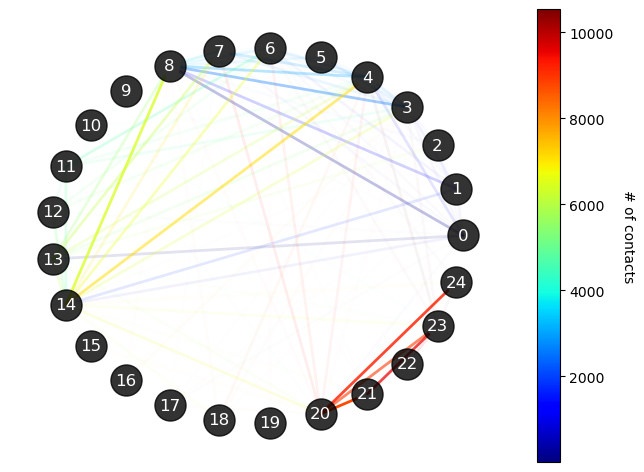

In [3]:
## Monta o grafo usando nx
H = nx.DiGraph()
labels = {}
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
max_peso_aux = 0.99

for key, values in grafo.items():
    for value in values:
        #print(f"{key} - {value} - {pesos[key, value]}")
        H.add_edge(int(key), int(value), weight = pesos[key, value])
        labels[int(key)] = int(key)
        labels[int(value)] = int(value)

#'''
G=nx.DiGraph()
G.add_nodes_from(sorted(H.nodes))
G.add_edges_from(list(H.edges()))
#'''
        
pos = nx.layout.shell_layout(G)

## draw labels
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='white')
#nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

index = 0
for edge in G.edges:
    valor = pesos[str(list(edge)[0]), str(list(edge)[1])]/max_peso
    edge_alphas[index] = valor
    index+=1

nodes = nx.draw_networkx_nodes(G, pos, node_color='black',
                              node_size=500, alpha=0.8)
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.get_cmap('jet'), width=2, alpha=1)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.get_cmap('jet'))
pc.set_array(range(1,max_peso))
cbar = plt.colorbar(pc)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('# of contacts', rotation=270)

ax = plt.gca()
ax.set_axis_off()
#plt.figure(5,figsize=(12,12))
plt.show()

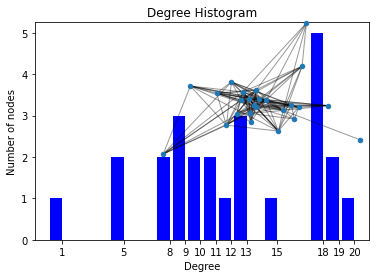

In [4]:
import collections
G_bidirecional = nx.Graph()

for key, values in grafo.items():
    for value in values:
        #print(f"{key} - {value} - {pesos[key, value]}")
        G_bidirecional.add_edge(int(key), int(value), weight = pesos[key, value])
        
degree_sequence = sorted([d for n, d in G_bidirecional.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.style.use('seaborn-dark-palette')
plt.style.use('grayscale')
fig.patch.set_facecolor('white')

plt.title("Degree Histogram")
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_axisbelow(True)
#ax.grid(linestyle=':', linewidth='0.5', color='black')

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G_bidirecional.subgraph(sorted(nx.connected_components(G_bidirecional), key=len, reverse=True)[0])
pos = nx.spring_layout(G_bidirecional)
plt.axis('off')
nx.draw_networkx_nodes(G_bidirecional, pos, node_size=20)
nx.draw_networkx_edges(G_bidirecional, pos, alpha=0.4)

plt.show()

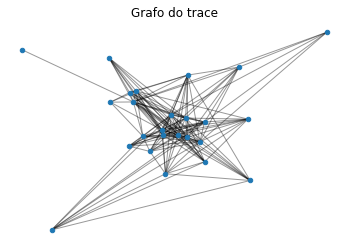

In [5]:
fig, ax = plt.subplots()

plt.style.use('seaborn-dark-palette')
plt.style.use('grayscale')
fig.patch.set_facecolor('white')

plt.title("Grafo do trace")
#ax.grid(linestyle=':', linewidth='0.5', color='black')

# draw graph in inset
Gcc = G_bidirecional.subgraph(sorted(nx.connected_components(G_bidirecional), key=len, reverse=True)[0])
pos = nx.spring_layout(G_bidirecional)
plt.axis('off')
nx.draw_networkx_nodes(G_bidirecional, pos, node_size=20)
nx.draw_networkx_edges(G_bidirecional, pos, alpha=0.4)

plt.show()

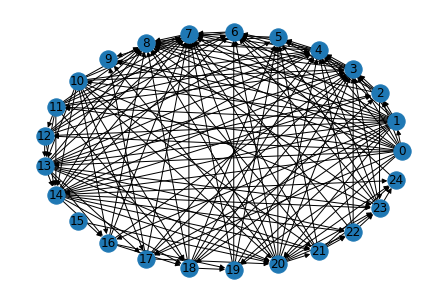

Betweenness
00 0.000
01 0.003
02 0.009
03 0.014
04 0.010
05 0.003
06 0.007
07 0.029
08 0.000
09 0.000
10 0.001
11 0.001
12 0.000
13 0.023
14 0.028
15 0.000
16 0.006
17 0.001
18 0.014
19 0.003
20 0.039
21 0.002
22 0.002
23 0.014
24 0.001
Degree centrality
00 0.625
01 0.750
02 0.417
03 0.792
04 0.750
05 0.458
06 0.542
07 0.833
08 0.750
09 0.208
10 0.542
11 0.458
12 0.375
13 0.750
14 0.792
15 0.042
16 0.375
17 0.375
18 0.500
19 0.333
20 0.750
21 0.417
22 0.333
23 0.542
24 0.208
Closeness centrality
00 0.000
01 0.042
02 0.260
03 0.602
04 0.614
05 0.519
06 0.575
07 0.776
08 0.787
09 0.501
10 0.056
11 0.083
12 0.125
13 0.208
14 0.250
15 0.000
16 0.204
17 0.188
18 0.242
19 0.225
20 0.307
21 0.260
22 0.280
23 0.391
24 0.344
Degree
00 15.000
01 18.000
02 10.000
03 19.000
04 18.000
05 11.000
06 13.000
07 20.000
08 18.000
09 5.000
10 13.000
11 11.000
12 9.000
13 18.000
14 19.000
15 1.000
16 9.000
17 9.000
18 12.000
19 8.000
20 18.000
21 10.000
22 8.000
23 13.000
24 5.000


In [6]:
from operator import itemgetter

pos = nx.spring_layout(G, iterations=500)
nx.draw_circular(G, with_labels=True)
plt.show()        

print("Betweenness")
b = nx.betweenness_centrality(G)
for v in sorted(G.nodes()):
    print("%0.2d %5.3f" % (int(v), b[v]))

print("Degree centrality")
d = nx.degree_centrality(G)
for v in sorted(G.nodes()):
    print("%0.2d %5.3f" % (int(v), d[v]))

print("Closeness centrality")
c = nx.closeness_centrality(G)
for v in sorted(G.nodes()):
    print("%0.2d %5.3f" % (int(v), c[v]))

print("Degree")
for v in sorted(G.nodes()):
    print("%0.2d %5.3f" % (int(v), G.degree[v]))

In [7]:
# coding: utf-8

__author__ = "Juliano Fischer Naves"


class Event:
    def __init__(self, d):
        self.from_node = d["from"]
        self.to_node = d["to"]
        self.time = d["time"]
        self.__status = d["status"].lower()
        self.opening = None

        #print("Constructing event with status %s" % (self.__status,))

        if self.__status == "up":
            self.opening = True
        elif self.__status == "down":
            self.opening = False
        else:
            raise Exception("Evento não é down nem up (%s)" % (self.__status,))

    def is_opening(self):
        return self.opening

    def __str__(self):
        return "event [%d,%d,%d,%s]" % (self.time, self.from_node, self.to_node, self.__status)


class Connection:
    def __init__(self, event):

        self.end_time = None

        if event:
            self.from_node = event.from_node
            self.to_node = event.to_node
            self.init_time = event.time

    def duration(self):
        assert self.end_time, "end_time not set - unable to compute duration"
        return self.end_time - self.init_time

    def get_id(self):
        return str(min(self.from_node, self.to_node)) + ":"+str(max(self.from_node,self.to_node))

    # Se a conexão já foi fechada
    def was_closed(self):
        return self.end_time is None

    # def __eq__(self, other):
    #    return isinstance(other,self.__class__) and self.from_node == other.from_node and self.to_node == other.to_node and self.init_time == other.init_time

    def is_same_connection(self, c):
        return (c.from_node == self.from_node and self.to_node == c.to_node) or (
            c.from_node == self.to_node and c.to_node == self.from_node)

        # def __hash__(self):
        #    if self.from_node > self.to_node:
        #        return hash((self.from_node, self.to_node))
        #    else:
        #        return hash((self.to_node,self.from_node))

    def __str__(self):
        end = self.end_time if self.end_time is not None else -1
        return "connection [%d, %d, %d, %d]" % (self.init_time, self.from_node, self.to_node, end)

In [8]:
# coding: utf-8

import argparse
import networkx as nx
import warnings
import os
import shutil

__author__ = "Juliano Fischer Naves"

PASTA = trace_file + '_analyzed/'
COMPONENTS_FILE_NAME = PASTA + "components_log.txt"
CONNECTIONSLOG_FILE_NAME = PASTA + "connections_out_file.txt"

LARGEST_CONNECTED_COMPONENT_REPORT = PASTA + "largest_connected_components_report.txt"

NUMBER_OF_CONNECTED_COMPONENTS_REPORT = PASTA + "number_of_connected_components_report.txt"

CONNECTIONS_DURATION_CDF_REPORT = PASTA + "connections_duration_pdf_report.txt"

def _init(log_step = 30):
    global g, last_file_position, __f, number_of_nodes, endtime, created_connections, \
        open_connections, largest_connected_component, logging_step, last_log, connected_components_log, \
    max_node_degree, list_of_average_node_degrees

    number_of_nodes = int(len(G.nodes))

    g = nx.Graph()
    g.add_nodes_from(range(number_of_nodes))

    last_file_position = None

    filename = 'traces/' + trace_file
    __f = open(filename)
    
    ## cria pasta para os analyzed
    if os.path.exists(PASTA):
        shutil.rmtree(PASTA)
    os.mkdir(PASTA)

    # default value is 30
    logging_step = int(log_step)
    endtime = int(endtime)

    created_connections = []
    open_connections = []
    connected_components_log = {}
    largest_connected_component = 0
    last_log = 0
    max_node_degree = 0;
    list_of_average_node_degrees = []

# convert a trace line to an object of Event
def get_event(line):
    l = line.split()
    d = dict()
    d["from"] = int(l[2])
    d["to"] = int(l[3])
    d["event"] = l[1]
    d["time"] = int(l[0])
    d["status"] = l[4]
    e = Event(d)
    return e

    
# apply and event to the graph (add or remove an edge)
def apply_graph_change(event):
    if event.is_opening():
        g.add_edge(event.from_node, event.to_node)
    else:
        if g.has_edge(event.from_node, event.to_node):
            g.remove_edge(event.from_node, event.to_node)
        else:
            warnings.warn("Trying to remove an inexistent edge")

            
# receives an event and remove a connection from open_connections besides add closing time to the object of Connection
def close_connection(e):
    to_remove = None
    for c in open_connections:
        if c.is_same_connection(e):
            c.end_time = e.time
            to_remove = c
            break
    try:
        open_connections.remove(to_remove)
    except:
        pass


# returns the events of this instant
def get_events_at_instant(time):
    global last_file_position
    last_file_position = __f.tell()
    l = __f.readline().strip()
    _list = []

    # end of the file
    if len(l) == 0:
        return _list

    e = get_event(l)

    # only events of this instant (now)
    while e.time == time:
        _list.append(e)
        last_file_position = __f.tell()
        l = __f.readline().strip()

        # end of the file
        if len(l) == 0:
            break

        e = get_event(l)

    # the last read event occurred after "instant"
    # Moves the file pointer to the last read line
    __f.seek(last_file_position)

    return _list


# e: the event to be processed
def process_event(e):
    apply_graph_change(e)

    # add one connection to open_connections or close the connection
    if e.is_opening():
        c = Connection(e)
        open_connections.append(c)
        created_connections.append(c)
    else:
        # it is a connection closing event
        close_connection(e)
        
# run the analysis from begin to ending
def run():
    global largest_connected_component, last_log, max_node_degree, list_of_average_node_degrees

    for instant in range(0, endtime+1):
        if instant%3600 == 0:
            print(f"processing {instant/3600} hour...")
        events = get_events_at_instant(instant)

        for e in events:
            process_event(e)

        # get the largest_connected_component
        connected_components = nx.connected_components(g)
        largest = max([len(x) for x in connected_components])
        largest_connected_component = largest if largest > largest_connected_component else largest_connected_component

        list_of_connected_components = list(nx.connected_components(g))

        degrees = [g.degree(node) for node in g.nodes()]
        max_node_degree = max(max_node_degree, max(degrees))

        list_of_average_node_degrees.append(sum(degrees)/len(degrees))

        # instant is equivalent to 'now'
        if instant - last_log >= logging_step:
            last_log = instant
            # connected_components_log.append("%d    %s\n" % (instant, str(list_of_connected_components)))
            connected_components_log[instant] = list_of_connected_components

    close_remaining_connections(endtime)
    # perform post processing information extraction
    post_processing()

# setting end time for connections which are not closed at trace ending
def close_remaining_connections(t):
    for c in open_connections:
        c.end_time = t


# perform post processing information extraction
def post_processing():
    # write down the log information
    print('\t#### Dados sobre o trace %s ####' % (trace_file,))
    print('\tGranularidade (s): %d' % (int(logging_step),))
    print('\tNumber of nodes: %d\n\n' % (len(G.nodes()),))
    print("Number of connections: %d" % (get_number_of_connections(),))
    print("Number of edges: %d" % (M,))
    print("Graph density: %f" % (2*M/(len(G.nodes()) * (len(G.nodes())-1)),))
    print("Average number of connections (per nodes): %f" % (get_average_number_of_connections(),))
    print("Connections per minute: %f" % (get_connections_per_minute(), ))
    print("Total connection time: %d" % (get_total_connection_time(),))
    print("Average connection time (per connection): %f" % (get_average_connection_time()))
    print("Largest connected component: %d" % (largest_connected_component,))
    print("Average largest connected component %f" % (get_average_largest_connected_component(),))
    print("Median largest connected component %f" % (get_median_largest_connected_component(),))
    print("Average number of connected components %f" % (get_average_number_of_connected_components(),))
    print("Median number of connected components %f" % (get_median_number_of_connected_components(),))
    print("Max node degree: %d" % (max_node_degree,))
    print("Average node degree: %f" % (get_average_node_degree(),))
    do_the_log()


def do_the_log():
    # logging components
    components_file = open(COMPONENTS_FILE_NAME, "w+")
    for key in sorted(connected_components_log):
        components_file.write("%d    %s\n" % (key, str(connected_components_log[key])))

    # logging connections
    connections_out_file = open(CONNECTIONSLOG_FILE_NAME, "w+")
    connections_out_file.writelines([str(c)+"\n" for c in created_connections])

    # largest connected component
    log_largest_connected_component_evolution()

    # number of connected components
    log_number_of_connected_components()

    log_connection_duration_pdf()


# get de average node degree (number of links)
def get_average_node_degree():
    return sum(list_of_average_node_degrees)/len(list_of_average_node_degrees)


# get the total number of connections
def get_number_of_connections():
    return len(created_connections)


# get the average number of connections by node
def get_average_number_of_connections():
    return get_number_of_connections() / number_of_nodes


# get the total connection time - sum of duration of all connections
def get_total_connection_time():
    return sum(c.duration() for c in created_connections)


# get the average connection time  - total_connection_time/total_of_connections
def get_average_connection_time():
    return get_total_connection_time() / get_number_of_connections()


# get the number of connections per minute
def get_connections_per_minute():
    minutes = endtime / 60
    return get_number_of_connections() / minutes


# format: time    largest_connected_component
# output: largest_connected_components_report.txt
def log_largest_connected_component_evolution():
    with open(LARGEST_CONNECTED_COMPONENT_REPORT, "w+") as f:
        for key in sorted(connected_components_log):
            components = connected_components_log[key]
            largest = max([len(x) for x in components])
            f.write("%d    %d\n" % (key, largest))


def get_cdf(a_list):
    d = {}
    a_list = sorted(a_list)
    size = len(a_list)
    for i, item in enumerate(a_list):
        d[item] = (i+1)/size

    return d


def log_connection_duration_pdf():
    durations = [c.duration() for c in created_connections]
    cdf_dict = get_cdf(durations)

    with open(CONNECTIONS_DURATION_CDF_REPORT, "w+") as f:
        for i in cdf_dict:
            f.write("%f    %f\n" % (i, cdf_dict[i]))


   # with open(CONNECTIONS_DURATION_PDF_REPORT,"w+") as f:
   #    for d in durations:
   #         f.write("%f    ")




def get_average_largest_connected_component():
    l = []
    for components in connected_components_log.values():
        l.append(max([len(x) for x in components]))

    return sum(l)/len(l)


def get_median_largest_connected_component():
    l = []
    for components in connected_components_log.values():
        l.append(max([len(x) for x in components]))

    return get_median(l)


# format: time    number of components (partitions)
# output: number_of_connected_components_report.txt
def log_number_of_connected_components():
    with open(NUMBER_OF_CONNECTED_COMPONENTS_REPORT, "w+") as f:
        for key in sorted(connected_components_log):
            number_of_components = len(connected_components_log[key])
            f.write("%d    %d\n" % (key, number_of_components))


def get_average_number_of_connected_components():
    l = [len(x) for x in connected_components_log.values()]
    return sum(l) / len(l)


def get_median_number_of_connected_components():
    l = [len(x) for x in connected_components_log.values()]
    return get_median(l)


# returns the median value of a list
def get_median(l):
    l = sorted(l)
    if len(l) % 2 == 1:
        return l[len(l)//2]
    else:
        return (l[len(l)//2] + l[(len(l)//2)-1])/2    
    
_init(log_step)
run()

processing 0.0 hour...


C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:74: UserWarning: Trying to remove an inexistent edge


processing 1.0 hour...
processing 2.0 hour...
processing 3.0 hour...
processing 4.0 hour...
processing 5.0 hour...
processing 6.0 hour...
processing 7.0 hour...
processing 8.0 hour...
processing 9.0 hour...
processing 10.0 hour...
processing 11.0 hour...
processing 12.0 hour...
processing 13.0 hour...
processing 14.0 hour...
processing 15.0 hour...
processing 16.0 hour...
processing 17.0 hour...
processing 18.0 hour...
processing 19.0 hour...
processing 20.0 hour...
processing 21.0 hour...
processing 22.0 hour...
processing 23.0 hour...
processing 24.0 hour...
processing 25.0 hour...
processing 26.0 hour...
processing 27.0 hour...
processing 28.0 hour...
processing 29.0 hour...
processing 30.0 hour...
processing 31.0 hour...
processing 32.0 hour...
processing 33.0 hour...
processing 34.0 hour...
processing 35.0 hour...
processing 36.0 hour...
processing 37.0 hour...
processing 38.0 hour...
processing 39.0 hour...
processing 40.0 hour...
processing 41.0 hour...
processing 42.0 hour...
p

processing 334.0 hour...
processing 335.0 hour...
processing 336.0 hour...
processing 337.0 hour...
processing 338.0 hour...
processing 339.0 hour...
processing 340.0 hour...
processing 341.0 hour...
processing 342.0 hour...
processing 343.0 hour...
processing 344.0 hour...
processing 345.0 hour...
processing 346.0 hour...
processing 347.0 hour...
processing 348.0 hour...
processing 349.0 hour...
processing 350.0 hour...
processing 351.0 hour...
processing 352.0 hour...
processing 353.0 hour...
processing 354.0 hour...
processing 355.0 hour...
processing 356.0 hour...
processing 357.0 hour...
processing 358.0 hour...
processing 359.0 hour...
processing 360.0 hour...
processing 361.0 hour...
processing 362.0 hour...
processing 363.0 hour...
processing 364.0 hour...
processing 365.0 hour...
processing 366.0 hour...
processing 367.0 hour...
processing 368.0 hour...
processing 369.0 hour...
processing 370.0 hour...
processing 371.0 hour...
processing 372.0 hour...
processing 373.0 hour...


processing 662.0 hour...
processing 663.0 hour...
processing 664.0 hour...
processing 665.0 hour...
processing 666.0 hour...
processing 667.0 hour...
processing 668.0 hour...
processing 669.0 hour...
processing 670.0 hour...
processing 671.0 hour...
processing 672.0 hour...
processing 673.0 hour...
processing 674.0 hour...
processing 675.0 hour...
processing 676.0 hour...
processing 677.0 hour...
processing 678.0 hour...
processing 679.0 hour...
processing 680.0 hour...
processing 681.0 hour...
processing 682.0 hour...
processing 683.0 hour...
processing 684.0 hour...
processing 685.0 hour...
processing 686.0 hour...
processing 687.0 hour...
processing 688.0 hour...
processing 689.0 hour...
processing 690.0 hour...
processing 691.0 hour...
processing 692.0 hour...
processing 693.0 hour...
processing 694.0 hour...
processing 695.0 hour...
processing 696.0 hour...
processing 697.0 hour...
processing 698.0 hour...
processing 699.0 hour...
processing 700.0 hour...
processing 701.0 hour...


processing 990.0 hour...
processing 991.0 hour...
processing 992.0 hour...
processing 993.0 hour...
processing 994.0 hour...
processing 995.0 hour...
processing 996.0 hour...
processing 997.0 hour...
processing 998.0 hour...
processing 999.0 hour...
processing 1000.0 hour...
processing 1001.0 hour...
processing 1002.0 hour...
processing 1003.0 hour...
processing 1004.0 hour...
processing 1005.0 hour...
processing 1006.0 hour...
processing 1007.0 hour...
processing 1008.0 hour...
processing 1009.0 hour...
processing 1010.0 hour...
processing 1011.0 hour...
processing 1012.0 hour...
processing 1013.0 hour...
processing 1014.0 hour...
processing 1015.0 hour...
processing 1016.0 hour...
processing 1017.0 hour...
processing 1018.0 hour...
processing 1019.0 hour...
processing 1020.0 hour...
processing 1021.0 hour...
processing 1022.0 hour...
processing 1023.0 hour...
processing 1024.0 hour...
processing 1025.0 hour...
processing 1026.0 hour...
processing 1027.0 hour...
processing 1028.0 hour

processing 1306.0 hour...
processing 1307.0 hour...
processing 1308.0 hour...
processing 1309.0 hour...
processing 1310.0 hour...
processing 1311.0 hour...
processing 1312.0 hour...
processing 1313.0 hour...
processing 1314.0 hour...
processing 1315.0 hour...
processing 1316.0 hour...
processing 1317.0 hour...
processing 1318.0 hour...
processing 1319.0 hour...
processing 1320.0 hour...
processing 1321.0 hour...
processing 1322.0 hour...
processing 1323.0 hour...
processing 1324.0 hour...
processing 1325.0 hour...
processing 1326.0 hour...
processing 1327.0 hour...
processing 1328.0 hour...
processing 1329.0 hour...
processing 1330.0 hour...
processing 1331.0 hour...
processing 1332.0 hour...
processing 1333.0 hour...
processing 1334.0 hour...
processing 1335.0 hour...
processing 1336.0 hour...
processing 1337.0 hour...
processing 1338.0 hour...
processing 1339.0 hour...
processing 1340.0 hour...
processing 1341.0 hour...
processing 1342.0 hour...
processing 1343.0 hour...
processing 1

processing 1622.0 hour...
processing 1623.0 hour...
processing 1624.0 hour...
processing 1625.0 hour...
processing 1626.0 hour...
processing 1627.0 hour...
processing 1628.0 hour...
processing 1629.0 hour...
processing 1630.0 hour...
processing 1631.0 hour...
processing 1632.0 hour...
processing 1633.0 hour...
processing 1634.0 hour...
processing 1635.0 hour...
processing 1636.0 hour...
processing 1637.0 hour...
processing 1638.0 hour...
processing 1639.0 hour...
processing 1640.0 hour...
processing 1641.0 hour...
processing 1642.0 hour...
processing 1643.0 hour...
processing 1644.0 hour...
processing 1645.0 hour...
processing 1646.0 hour...
processing 1647.0 hour...
processing 1648.0 hour...
processing 1649.0 hour...
processing 1650.0 hour...
processing 1651.0 hour...
processing 1652.0 hour...
processing 1653.0 hour...
processing 1654.0 hour...
processing 1655.0 hour...
processing 1656.0 hour...
processing 1657.0 hour...
processing 1658.0 hour...
processing 1659.0 hour...
processing 1

In [9]:
print('finished')

finished
